# Copyright

<PRE>
This notebook was created as part of the "Deep learning / VITMMA19" class at
Budapest University of Technology and Economics, Hungary,
https://portal.vik.bme.hu/kepzes/targyak/VITMMA19

Any re-use or publication of any part of the notebook is only allowed with the
 written consent of the authors.

2024 (c) Mohammed Salah Al-Radhi (malradhi@tmit.bme.hu)
</PRE>

In [1]:
# This tutorial provides an in-depth exploration of PyTorch, focusing on building, training, and evaluating neural networks.
# We'll also cover advanced topics like saving/loading models and leveraging GPU acceleration.


In [2]:
# To install PyTorch, run the following command:
!pip install torch torchvision torchaudio


In [3]:
# Check if PyTorch is installed
import torch
print("PyTorch version:", torch.__version__)

PyTorch version: 2.4.1+cu121


In [4]:
## Creating Tensors with Different Data Types

# Float tensor
float_tensor = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32)
print("Float Tensor:\n", float_tensor)

# Integer tensor
int_tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.int32)
print("Integer Tensor:\n", int_tensor)

# Random tensor
random_tensor = torch.rand((2, 3), dtype=torch.float32)
print("Random Tensor:\n", random_tensor)

Float Tensor:
 tensor([[1., 2.],
        [3., 4.]])
Integer Tensor:
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
Random Tensor:
 tensor([[0.2481, 0.9429, 0.9341],
        [0.6872, 0.2918, 0.9819]])


# **Tensor Operations**

In [5]:
# Element-wise operations
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])
c = a + b
print("Element-wise Addition:", c)

# Example tensors for matrix multiplication
float_tensor = torch.tensor([[1.0, 2.0], [3.0, 4.0]])  # Float tensor
int_tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)  # Convert to float

# Matrix multiplication
d = torch.matmul(float_tensor, int_tensor)
print("Matrix Multiplication:\n", d)

Element-wise Addition: tensor([5., 7., 9.])
Matrix Multiplication:
 tensor([[ 7., 10.],
        [15., 22.]])


# **Building a Neural Network**

In [6]:
# We'll build a more complex neural network with multiple layers.
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Create dummy dataset
inputs = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=torch.float32)
targets = torch.tensor([[0.0], [1.0], [1.0], [0.0]], dtype=torch.float32)


# Define the neural network class
class AdvancedNN(nn.Module):
    def __init__(self):
        super(AdvancedNN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Input layer to hidden layer 1
        self.layer2 = nn.Linear(4, 4)  # Hidden layer 1 to hidden layer 2
        self.output_layer = nn.Linear(4, 1)  # Hidden layer 2 to output layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return self.output_layer(x)

# Instantiate the model
model = AdvancedNN()
print(model)

AdvancedNN(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=4, bias=True)
  (output_layer): Linear(in_features=4, out_features=1, bias=True)
)


# **Training and Evaluation**

In [7]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Initialize lists to store loss and accuracy values
loss_values = []
eval_accuracy_values = []

# Training loop
for epoch in range(200):
    model.train()

    optimizer.zero_grad()  # Zero the gradients
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs, targets)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Optimize

    # Store the training loss value
    loss_values.append(loss.item())

In [8]:
# Function to evaluate the model and return loss and accuracy
def evaluate_model(model, inputs, targets):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        predictions = model(inputs)
        loss = criterion(predictions, targets)

        # Calculate accuracy
        predicted_classes = (predictions > 0.5).float()  # Assuming binary classification
        accuracy = (predicted_classes == targets).float().mean().item()  # Calculate accuracy

        return loss.item(), accuracy

In [9]:
# Evaluate the model at certain epochs
if epoch % 20 == 0:
  eval_loss, eval_accuracy = evaluate_model(model, inputs, targets)
  eval_accuracy_values.append(eval_accuracy)
  print(f'Epoch {epoch}, Loss: {loss.item()}, Eval Loss: {eval_loss}, Eval Accuracy: {eval_accuracy}')

# **Saving and Loading Models**

In [10]:
# It's important to save the trained model for future use.

# Save the model's state_dict
torch.save(model.state_dict(), 'advanced_nn.pth')
print("Model saved successfully.")

Model saved successfully.


In [11]:
# Load the model
loaded_model = AdvancedNN()
loaded_model.load_state_dict(torch.load('advanced_nn.pth'))
loaded_model.eval()  # Set to evaluation mode
print("Model loaded successfully.")

Model loaded successfully.


<ipython-input-11-66dbaa855316>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('advanced_nn.pth'))


# **Visualization**

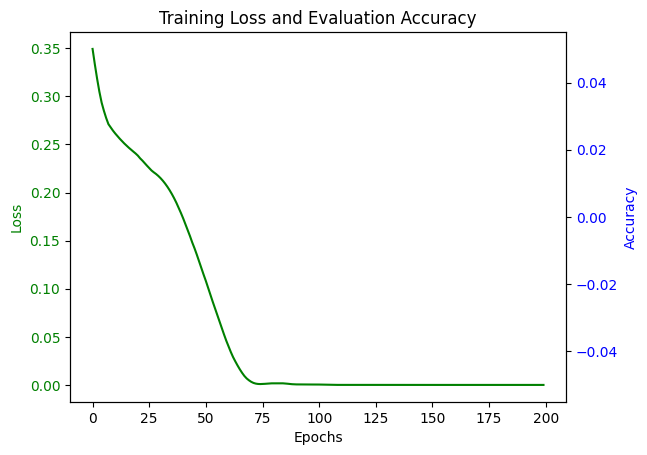

In [12]:
# Function to plot loss and accuracy
import matplotlib.pyplot as plt
def plot_loss_and_accuracy(loss_values, accuracy_values):
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()  # Create a second y-axis
  ax1.plot(loss_values, 'g-', label='Loss')
  ax1.set_xlabel("Epochs")
  ax1.set_ylabel("Loss", color='g')
  ax1.tick_params(axis='y', labelcolor='g')
  ax1.set_title("Training Loss and Evaluation Accuracy")
  ax2.plot(range(0, len(accuracy_values) * 20, 20), accuracy_values, 'b-', label='Accuracy')
  ax2.set_ylabel("Accuracy", color='b')
  ax2.tick_params(axis='y', labelcolor='b')
  plt.show()

# After training, plot the loss and accuracy values
plot_loss_and_accuracy(loss_values, eval_accuracy_values)

# **Using GPU**

In [13]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
inputs = inputs.to(device)
targets = targets.to(device)

# Training loop on GPU
for epoch in range(200):
    model.train()

    optimizer.zero_grad()  # Zero the gradients
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs, targets)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Optimize

    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()} on {device}')


Epoch 0, Loss: 1.3293435685568511e-08 on cpu
Epoch 20, Loss: 7.324967299382479e-10 on cpu
Epoch 40, Loss: 7.430234205685338e-11 on cpu
Epoch 60, Loss: 1.3306689083947276e-11 on cpu
Epoch 80, Loss: 5.444533712761768e-13 on cpu
Epoch 100, Loss: 2.495781359357352e-13 on cpu
Epoch 120, Loss: 2.6645352591003757e-14 on cpu
Epoch 140, Loss: 8.881784197001252e-16 on cpu
Epoch 160, Loss: 0.0 on cpu
Epoch 180, Loss: 0.0 on cpu


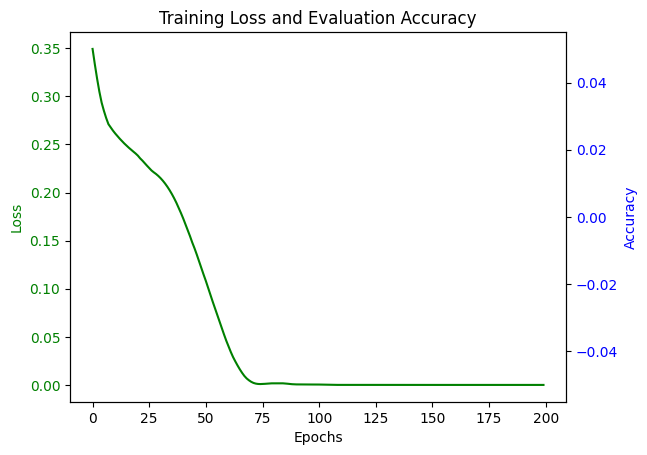

In [14]:
## Function to plot loss and accuracy

def plot_loss_and_accuracy(loss_values, accuracy_values):
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()  # Create a second y-axis
  ax1.plot(loss_values, 'g-', label='Loss')
  ax1.set_xlabel("Epochs")
  ax1.set_ylabel("Loss", color='g')
  ax1.tick_params(axis='y', labelcolor='g')
  ax1.set_title("Training Loss and Evaluation Accuracy")
  ax2.plot(range(0, len(accuracy_values) * 20, 20), accuracy_values, 'b-', label='Accuracy')
  ax2.set_ylabel("Accuracy", color='b')
  ax2.tick_params(axis='y', labelcolor='b')
  plt.show()

# After training, plot the loss and accuracy values
plot_loss_and_accuracy(loss_values, eval_accuracy_values)